In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload



In [ ]:
train_image_df = pd.read_csv("./datasets/image/images_dataset/Train_set/train_dataset.csv")
test_image_df = pd.read_csv("./datasets/image/images_dataset/Test_set/test_dataset.csv")

In [3]:
X_image_train, X_image_test = train_image_df.iloc[:, 1:], test_image_df.iloc[:, 1:]
Y_image_train, Y_image_test = train_image_df.iloc[:, 0], test_image_df.iloc[:, 0]

print(X_image_train.shape)
print(X_image_test.shape)

(1672, 12288)
(405, 12288)


In [4]:
from sklearn.decomposition import PCA

# Normalize the data
X_image_train /= 255.0
X_image_test /= 255.0

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1672) # make the dataframe have at most 1672 features

X_image_train = pca.fit_transform(X_image_train)

X_image_test = pca.transform(X_image_test)

In [17]:
print(X_image_train.shape)
print(X_image_test.shape)

(1672, 1672)
(405, 1672)


In [5]:
from sklearn.linear_model import LogisticRegression

LGRM = LogisticRegression(random_state=42, max_iter=1000)

LGRM.fit(X_image_train, Y_image_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
LGRM_Y_pred = LGRM.predict(X_image_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

k = 3  
KNNM = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2) #since metric='minkowski' and p=2, the Euclidean distance is used for measuring the distance between points.

KNNM.fit(X_image_train, Y_image_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
KNN_Y_pred = KNNM.predict(X_image_test)

<!------------------------------------------------------ Evaluation --------------------------------------------------------->


In [45]:
import utils.evaluation.image as image_eval


image_eval = reload(image_eval)


LGR_eval_info = image_eval.evaluate(LGRM, Y_image_test, LGRM_Y_pred, X_image_test)



In [46]:
LGR_eval_info

{'auc_curve_info': {'Y_test_bin': array([[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]]),
  'Y_score': array([[3.67613859e-01, 4.78601960e-01, 3.46248443e-10, 1.53784181e-01],
         [2.79407167e-03, 9.94302167e-01, 3.06272809e-06, 2.90069902e-03],
         [9.93091431e-01, 6.45779959e-03, 3.14435282e-10, 4.50769201e-04],
         ...,
         [4.72651962e-04, 3.48317064e-03, 4.22627583e-09, 9.96044173e-01],
         [2.17990987e-03, 3.38927682e-02, 5.07115153e-04, 9.63420207e-01],
         [9.34175322e-04, 9.43777645e-03, 9.40308481e-08, 9.89627954e-01]])},
 'acc_sc': 0.92,
 'cm': array([[ 22,   9,   0,   1],
        [  2, 279,   0,   6],
        [  0,   0,  32,   0],
        [  2,  11,   0,  41]]),
 'precision': np.float64(0.92),
 'recall': np.float64(0.92),
 'AUC': np.float64(0.96)}

In [47]:

import utils.evaluation.image as image_eval


image_eval = reload(image_eval)


KNN_eval_info = image_eval.evaluate(KNNM, Y_image_test, KNN_Y_pred, X_image_test)

In [48]:
KNN_eval_info

{'auc_curve_info': {'Y_test_bin': array([[1, 0, 0, 0],
         [1, 0, 0, 0],
         [1, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]]),
  'Y_score': array([[0.        , 1.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 1.        ],
         [0.66666667, 0.33333333, 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , 1.        ],
         [0.        , 0.        , 0.        , 1.        ],
         [0.        , 0.        , 0.        , 1.        ]])},
 'acc_sc': 0.84,
 'cm': array([[ 14,  12,   0,   6],
        [  2, 257,   0,  28],
        [  2,   0,  30,   0],
        [  0,  13,   0,  41]]),
 'precision': np.float64(0.84),
 'recall': np.float64(0.84),
 'AUC': np.float64(0.92)}

In [63]:
required_cols = ["acc_sc", "precision", "recall"]

LGR_row = [LGR_eval_info[key] for key in required_cols]

KNN_row = [KNN_eval_info[key] for key in required_cols]

cmp = ["Logistic Regression" if LGR_row[i] > KNN_row[i] else "KNN" if LGR_row[i] < KNN_row[i] else "Both of them" for i in range(len(required_cols))]

cmp_table = {
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Logistic Regression": LGR_row,
    "KNN": KNN_row,
    "Better Model": cmp
}

pd.DataFrame(cmp_table)


,Metric,Logistic Regression,KNN,Better Model
0,Accuracy,0.92,0.84,Logistic Regression
1,Precision,0.92,0.84,Logistic Regression
2,Recall,0.92,0.84,Logistic Regression


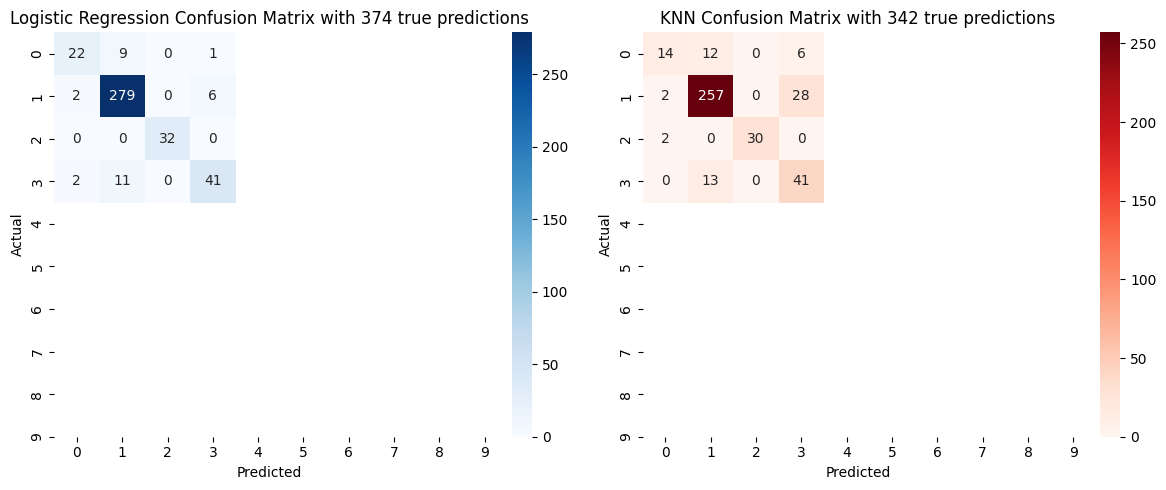

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(LGR_eval_info["cm"], annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), ax=axes[0])
axes[0].set_title(f'Logistic Regression Confusion Matrix with {np.trace(LGR_eval_info["cm"])} true predictions')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# KNN Confusion Matrix
sns.heatmap(KNN_eval_info["cm"], annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10), ax=axes[1])
axes[1].set_title(f'KNN Confusion Matrix with {np.trace(KNN_eval_info["cm"])} true predictions')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

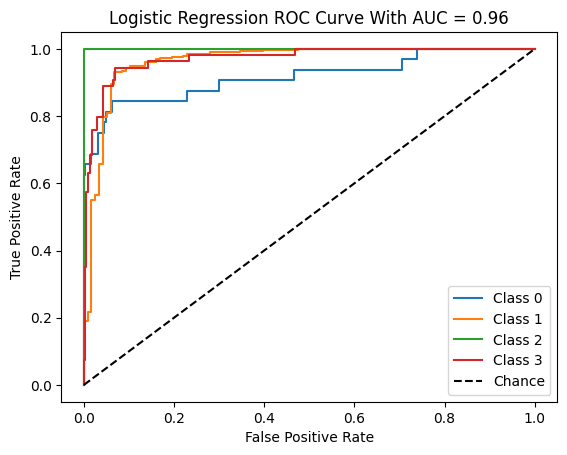

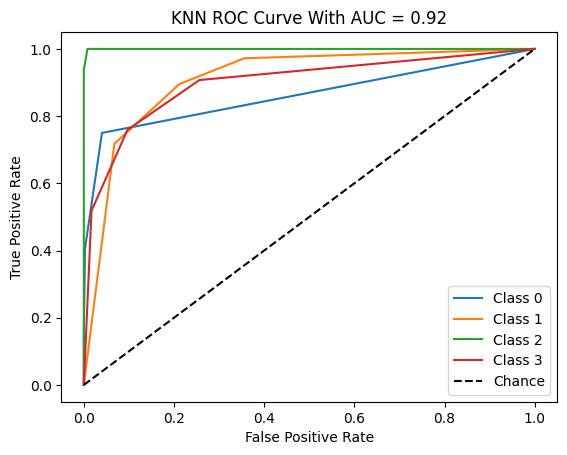

In [62]:
image_eval = reload(image_eval)

image_eval.show_roc_graph(f"Logistic Regression ROC Curve With AUC = {LGR_eval_info['AUC']}",LGR_eval_info["auc_curve_info"]["Y_test_bin"], LGR_eval_info["auc_curve_info"]["Y_score"])

image_eval.show_roc_graph(f"KNN ROC Curve With AUC = {KNN_eval_info['AUC']}",KNN_eval_info["auc_curve_info"]["Y_test_bin"], KNN_eval_info["auc_curve_info"]["Y_score"])

KeyboardInterrupt: 